In [16]:
# Term Project 

In [213]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

In [214]:
import thinkstats2
import thinkplot
import numpy as np
import sys
from collections import defaultdict

In [215]:
import pandas as pd

df = pd.read_csv("nics-firearm-background-checks.csv") 


In [216]:
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-03,Alabama,14315.0,263.0,23132.0,15158.0,1314.0,1269,0.0,17.0,...,0.0,0.0,0.0,35.0,34.0,8.0,0.0,0.0,0.0,59294
1,2023-03,Alaska,354.0,7.0,3295.0,2610.0,397.0,221,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7164
2,2023-03,Arizona,12965.0,1377.0,20940.0,10397.0,1772.0,1249,0.0,7.0,...,0.0,0.0,0.0,7.0,1.0,2.0,0.0,1.0,0.0,50957
3,2023-03,Arkansas,4460.0,595.0,8827.0,6436.0,573.0,547,4.0,14.0,...,0.0,0.0,0.0,7.0,12.0,4.0,0.0,0.0,0.0,23692
4,2023-03,California,25878.0,13200.0,40714.0,26473.0,5455.0,0,0.0,1.0,...,82.0,0.0,0.0,8581.0,3392.0,626.0,116.0,51.0,0.0,128399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16110,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
16111,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
16112,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
16113,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [217]:
df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [ ]:
# 5 variables

In [218]:
permit = df.permit
handgun = df.handgun
longgun = df.long_gun
other = df.other
permit_recheck = df.permit_recheck

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


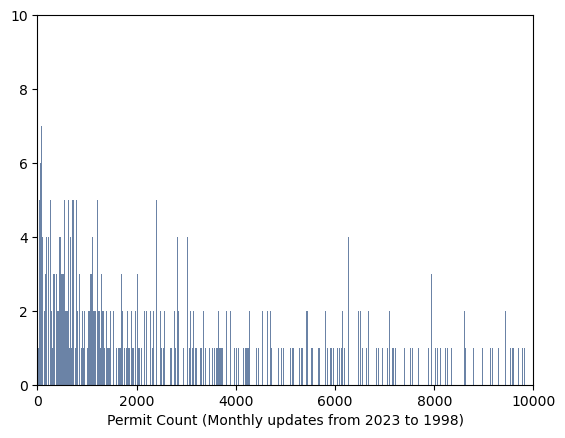

In [235]:
hist = thinkstats2.Hist(permit, label='Permits',)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Permit Count (Monthly updates from 2023 to 1998)', bins=200, xlim=[0,10000], ylim= [0,10])

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


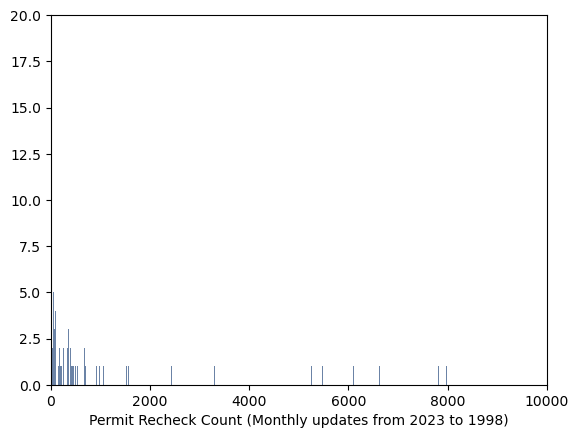

In [234]:
hist = thinkstats2.Hist(p_recheck, label='Permit Rechecks',)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Permit Recheck Count (Monthly updates from 2023 to 1998)', bins=200, xlim=[0,10000], ylim= [0,20])

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


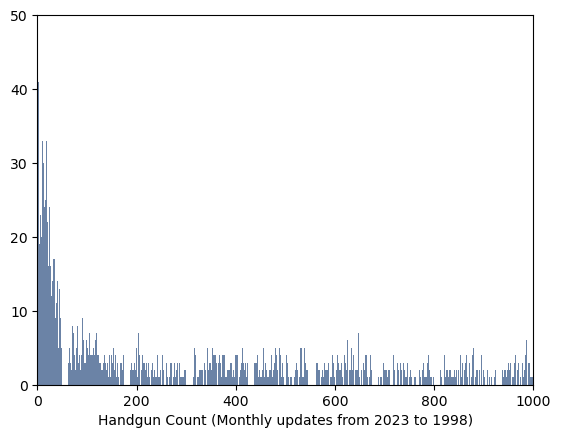

In [228]:
hist = thinkstats2.Hist(handgun, label='Handguns',)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Handgun Count (Monthly updates from 2023 to 1998)', bins=200, xlim=[0,1000], ylim= [0,50])

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


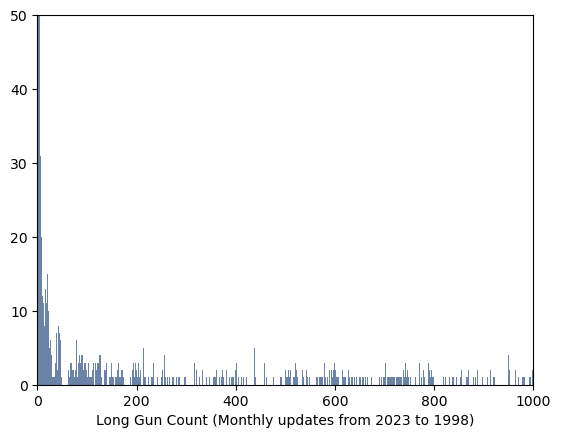

In [229]:
hist = thinkstats2.Hist(longgun, label='Long Guns',)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Long Gun Count (Monthly updates from 2023 to 1998)', bins=200, xlim=[0,1000], ylim= [0,50])

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


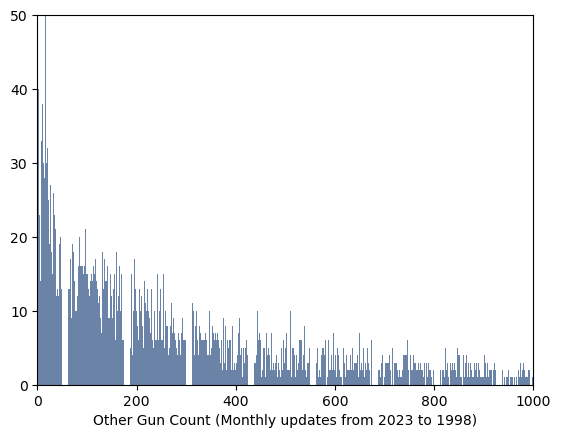

In [230]:
hist = thinkstats2.Hist(other, label='Other Guns',)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Other Gun Count (Monthly updates from 2023 to 1998)', bins=200, xlim=[0,1000], ylim= [0,50])

In [224]:
# • central tendency: Do the values tend to cluster around a particular
# point?
# • modes: Is there more than one cluster?
# • spread: How much variability is there in the values?
# • tails: How quickly do the probabilities drop off as we move away from
# the modes?
# • outliers: Are there extreme values far from the modes?

In [225]:
fl= df[df.state == 'Florida']
ca= df[df.state == 'California']

permit_fl = fl.permit
permit_ca = ca.permit


In [ ]:
hist = thinkstats2.Hist(other, label='Other Guns',)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Count (Monthly updates from 2023 to 1998)', bins=200, xlim=[0,1000], ylim= [0,50])

In [ ]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

In [137]:
fl_pmf = thinkstats2.Pmf(fl.permit, label="Florida Permits")
ca_pmf = thinkstats2.Pmf(ca.permit, label="California Permits")

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


In [ ]:
# Comparing permits in the state of florida and permits in the state of California

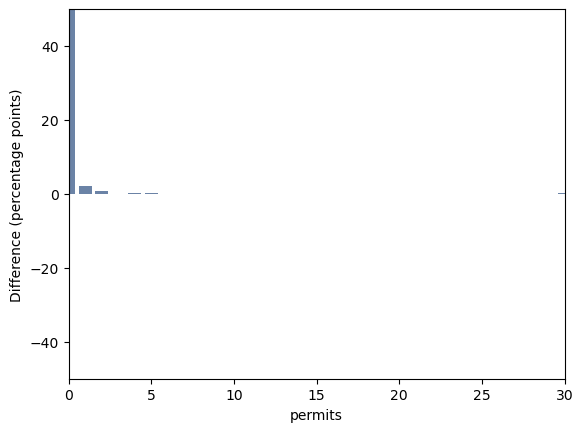

In [239]:
permits = range(0, 200)
diffs = []
for permit in permits:
    p1 = fl_pmf.Prob(permit)
    p2 = ca_pmf.Prob(permit)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(permits, diffs)
thinkplot.Config(xlabel='permits', ylabel='Difference (percentage points)', xlim= [0,30], ylim=[-50,50])

In [ ]:
#CDF

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


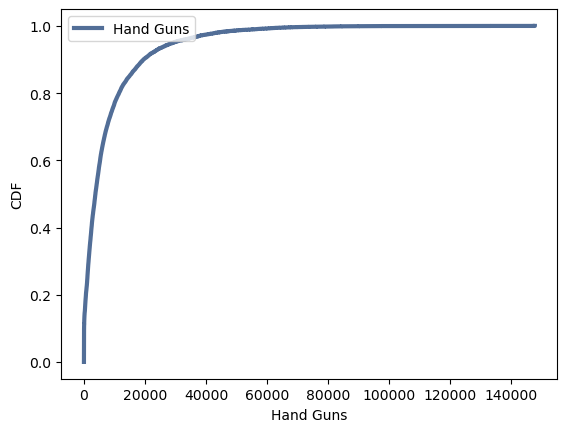

In [146]:
cdf = thinkstats2.Cdf(handgun, label='Hand Guns')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Hand Guns', ylabel='CDF', loc='upper left')

/Users/jocelyndisla/Documents/GitHub/ThinkStats2/code/thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


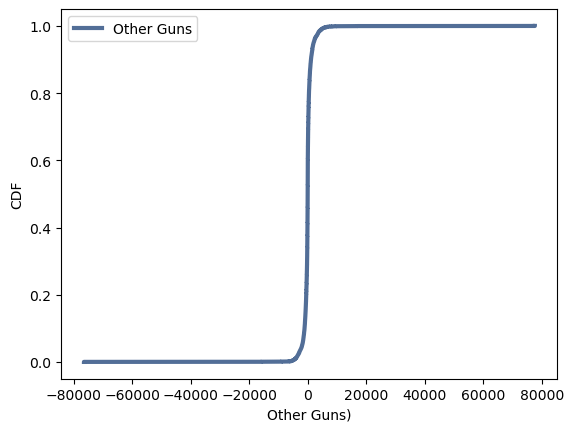

In [148]:
#Exponential distribution of other guns owned by the public 
diffs = df.other.diff()
cdf = thinkstats2.Cdf(diffs, label="Other Guns")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Other Guns)", ylabel="CDF")

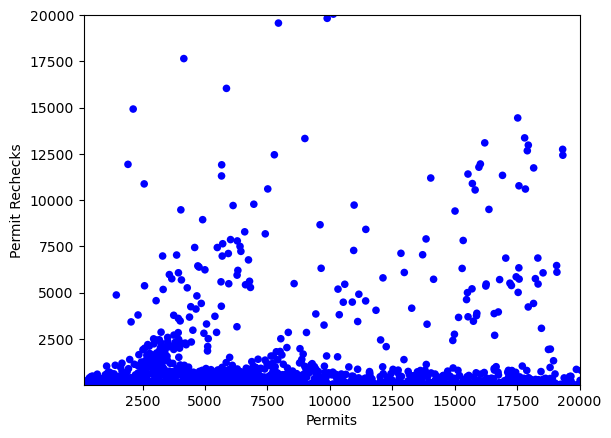

In [153]:
thinkplot.Scatter(df.permit, df.permit_recheck, alpha=1)
thinkplot.Config(xlabel='Permits',
                 ylabel='Permit Rechecks',
                 axis=[140, 20000, 20, 20000],
                 legend=False)

In [ ]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [171]:

Cov(df.permit_recheck, df.permit)

nan

In [206]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [207]:
Corr(df.permit_recheck, df.permit)

nan

In [208]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [209]:
SpearmanCorr(df.permit_recheck, df.permit)

0.27361704556872807

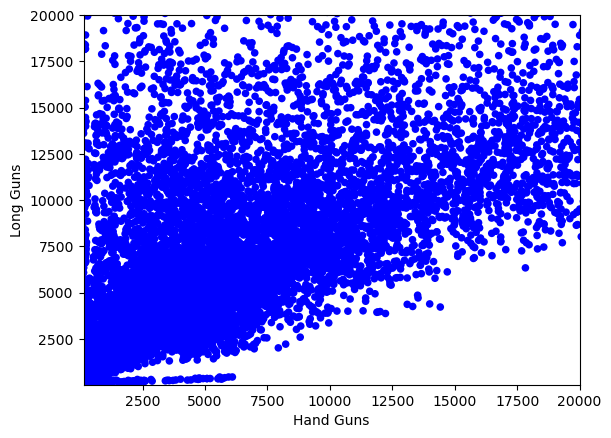

In [240]:
thinkplot.Scatter(df.handgun, df.long_gun, alpha=1)
thinkplot.Config(xlabel='Hand Guns',
                 ylabel='Long Guns',
                 axis=[140, 20000, 20, 20000],
                 legend=False)

In [241]:
Cov(df.handgun, df.long_gun)

nan

In [242]:
Corr(df.handgun, df.long_gun)

nan

In [243]:
SpearmanCorr(df.handgun, df.long_gun)

0.7696927859553069

In [ ]:
#Hypothesis testing 

In [182]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [183]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [265]:
data = df.handgun, df.permit

In [266]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [267]:
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [268]:
# multiple regression (173) here's quantity of permits as a function of handgun quantity 

In [272]:
import statsmodels.formula.api as smf

formula = 'permit ~ handgun'
model = smf.ols(formula, data=fl)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 permit   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     548.5
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           6.47e-69
Time:                        00:54:00   Log-Likelihood:                -2994.7
No. Observations:                 293   AIC:                             5993.
Df Residuals:                     291   BIC:                             6001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5357.2054    712.344     -7.521      0.000   -6759.205   -3955.206
handgun        0.4042      0.017     23.421      0.000       0.370       0.438
==============================================================================
Omnibus:                       38.266   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.702
Skew:                          -0.469   Prob(JB):                     1.70e-31
Kurtosis:                       6.275   Cond. No.                     7.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""